In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

# the directory where your data is
PATH_to_data = '/content/drive/My Drive/STROKE_code/MMPOSE/data/patient_output/v3/' # version of skeleton extraction files

'''
versions of target table:
2_1 = original
3 = each row as day for algorithm in csv
4 = each row as day
'''
PATH_to_target = '/content/drive/My Drive/STROKE_code/MMPOSE/data/patient_output/target/STROKE_NIHSS_3.csv'

PATH_to_process = '/content/drive/My Drive/STROKE_code/MMPOSE/data/patient_output/processed/NIHSS/'
import os
os.chdir(PATH_to_data)
import sys
sys.path.append(PATH_to_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_files = []
for cur_path in os.listdir(PATH_to_data):
    # check if current path is a file
    if os.path.isfile(os.path.join(PATH_to_data, cur_path)):
        data_files.append(cur_path) #name[0]
print(data_files)

['DD_18_2_v3.csv', 'DD_18_v3.csv', 'BC_09_v3.csv', 'OM_17_v3.csv', 'PC_06_v3.csv', 'LH_24_v3.csv', 'ND_11_v3.csv', 'LC_19_v3.csv', 'GK_25_v3.csv', 'AF_10_2_v3.csv', 'RD_37_v3.csv', 'MS_05_2_v3.csv', 'AF_10_v3.csv', 'CA_21_v3.csv', 'GD_23_v3.csv', 'MS_05_v3.csv', 'MC_22_v3.csv', 'RO_26_v3.csv', 'VK_16_v3.csv', 'BD_7_v3.csv', 'IM_38_v3.csv', 'AT_08_v3.csv', 'AC_20_v3.csv', 'KE_35_v3.csv', 'AK_34_v3.csv']


In [ ]:
patients_ID = []
for patient_data in data_files:
    cur_ID = patient_data.split(".csv")[0]
    #remove version
    cur_ID = cur_ID.split("_")
    cur_ID = cur_ID[0] + '_' + cur_ID[1]
    patients_ID.append(cur_ID)
print(patients_ID)

['DD_18', 'DD_18', 'BC_09', 'OM_17', 'PC_06', 'LH_24', 'ND_11', 'LC_19', 'GK_25', 'AF_10', 'RD_37', 'MS_05', 'AF_10', 'CA_21', 'GD_23', 'MS_05', 'MC_22', 'RO_26', 'VK_16', 'BD_7', 'IM_38', 'AT_08', 'AC_20', 'KE_35', 'AK_34']


In [ ]:
import pandas as pd
import numpy as np

# file_name = 'AK_34_v3.csv'
# FORMAT = '.csv'
# file_path = file_name #+ FORMAT

# create a dictionary with patient data, each key is a separate patient, but some patients have there recordings divided in 2 sections (different pose)
patients = {}
for file_name in data_files:
    patients [file_name] = pd.read_csv(file_name, index_col=0)

In [ ]:
patients.keys()

dict_keys(['DD_18_2_v3.csv', 'DD_18_v3.csv', 'BC_09_v3.csv', 'OM_17_v3.csv', 'PC_06_v3.csv', 'LH_24_v3.csv', 'ND_11_v3.csv', 'LC_19_v3.csv', 'GK_25_v3.csv', 'AF_10_2_v3.csv', 'RD_37_v3.csv', 'MS_05_2_v3.csv', 'AF_10_v3.csv', 'CA_21_v3.csv', 'GD_23_v3.csv', 'MS_05_v3.csv', 'MC_22_v3.csv', 'RO_26_v3.csv', 'VK_16_v3.csv', 'BD_7_v3.csv', 'IM_38_v3.csv', 'AT_08_v3.csv', 'AC_20_v3.csv', 'KE_35_v3.csv', 'AK_34_v3.csv'])

In [ ]:
target = pd.read_csv(PATH_to_target) #read_excel

target['patient_number'] = target['patient_number'].astype(int).astype(str)
# generate sting with patient number with 2 digits
target['patient_number'] = target['patient_number'].apply(lambda x: x.zfill(2) if len(x) == 1 else x)
target.head()

In [ ]:
target['Date of visit']

In [ ]:
target['patient_ID'] = target['patient_code'] + '_' + target['patient_number']
target['patient_ID'].unique()

array(['MS_05', 'PC_06', 'BD_07', 'AT_08', 'BC_09', 'AF_10', 'ND_11',
       'MR_14', 'VK_16', 'OM_17', 'DD_18', 'LC_19', 'AC_20', 'CA_21',
       'MC_22', 'GD_23', 'LH_24', 'GK_25', 'RO_26', 'AK_34', 'KE_35',
       'RD_37', 'IM_38'], dtype=object)

In [ ]:
df_patients = pd.concat(patients, sort=False)

df_patients[['patient_code', 'patient_initials', 'extra']] = df_patients['patient'].str.split('_', expand=True)
df_patients['patient_ID'] = df_patients['patient_code'] + '_' + df_patients['patient_initials']
df_patients = df_patients.drop(columns=['extra','patient_code', 'patient_initials'])

df_patients['patient_ID'] = df_patients['patient_ID'].str.replace('BD_7', 'BD_07')
df_patients['patient_ID'].unique()

array(['DD_18', 'BC_09', 'OM_17', 'PC_06', 'LH_24', 'ND_11', 'LC_19',
       'GK_25', 'AF_10', 'RD_37', 'MS_05', 'CA_21', 'GD_23', 'MC_22',
       'RO_26', 'VK_16', 'BD_07', 'IM_38', 'AT_08', 'AC_20', 'KE_35',
       'AK_34'], dtype=object)

In [ ]:
# select all rows related to specific patient using the 'patient_ID' index-column
df_select = df_patients.loc[  df_patients['patient_ID'] == 'AT_08'].copy()
df_select.head()

In [ ]:
df_select['day'].unique()

array([20210218, 20210219])

In [ ]:
'''
#important
df_select['patient_day_ID'] = df_select['patient_ID'].astype(str) + '_' + df_select['day'].astype(str)

# Set the maximum number of columns to be displayed
df_select['patient_day_ID'].unique()
'''

"\n#important\ndf_select['patient_day_ID'] = df_select['patient_ID'].astype(str) + '_' + df_select['day'].astype(str)\n\n# Set the maximum number of columns to be displayed\ndf_select['patient_day_ID'].unique()\n"

In [ ]:
#important
df_patients['patient_day_ID'] = df_patients['patient_ID'].astype(str) + '_' + df_patients['day'].astype(str)

# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', None)
df_patients['patient_day_ID'].unique()

array(['DD_18_20210321', 'DD_18_20210322', 'DD_18_20210320',
       'BC_09_20210224', 'BC_09_20210225', 'OM_17_20210319',
       'OM_17_20210320', 'OM_17_20210321', 'PC_06_20210208',
       'PC_06_20210209', 'PC_06_20210210', 'LH_24_20210409',
       'LH_24_20210410', 'LH_24_20210411', 'ND_11_20210301',
       'ND_11_20210302', 'LC_19_20210324', 'LC_19_20210325',
       'GK_25_20210416', 'GK_25_20210417', 'GK_25_20210418',
       'AF_10_20210301', 'AF_10_20210302', 'RD_37_20210721',
       'RD_37_20210722', 'RD_37_20210723', 'MS_05_20210209',
       'AF_10_20210228', 'CA_21_20210406', 'CA_21_20210407',
       'CA_21_20210408', 'GD_23_20210409', 'GD_23_20210410',
       'GD_23_20210411', 'MS_05_20210208', 'MC_22_20210406',
       'MC_22_20210407', 'MC_22_20210408', 'RO_26_20210424',
       'RO_26_20210425', 'RO_26_20210426', 'VK_16_20210319',
       'VK_16_20210320', 'BD_07_20210214', 'BD_07_20210215',
       'IM_38_20210723', 'IM_38_20210724', 'IM_38_20210725',
       'AT_08_20210218',

In [ ]:
print('we have {} days-NIHSS overall'.format(len(df_patients['patient_day_ID'].unique())) )

we have 58 days-NIHSS overall


In [ ]:
target.head(10)

In [ ]:
target['Date of visit']

In [ ]:
#important
target['patient_day_ID'] = target['patient_ID'].astype(str) + '_' + target['Date of visit'].str.replace("-", "").astype(str)
target.head(10)

In [ ]:
df_patients.set_index('patient_day_ID')

In [ ]:
np.sort(df_patients['patient_day_ID'].unique())

In [ ]:
target.set_index('patient_day_ID')

In [ ]:
np.sort(target['patient_day_ID'].unique())

In [ ]:
df_patients.head()

In [ ]:
print( 'We have {} patients, {} days-patients and {} rows in videos'.format(len(df_patients['patient_ID'].unique()),len(df_patients['patient_day_ID'].unique()), len(df_patients)) )

We have 22 patients, 58 days-patients and 1616238 rows in videos


In [ ]:
list_dp = df_patients['patient_day_ID'].unique()

In [ ]:
print( 'We have {} patients, {} days-patients in target table'.format(len(target['patient_ID'].unique()),len(target['patient_day_ID'].unique()) ) )

We have 23 patients, 69 days-patients in target table


In [ ]:
list_dp_target = target['patient_day_ID'].unique()

In [ ]:
print(list_dp)

In [ ]:
# Convert lists to sets
set1 = set(list_dp)
set2 = set(list_dp_target)

# Find values in list1 but not in list2
lost_values = set1 - set2

# Convert the result back to a list if needed
result_list = list(lost_values)

# Printing the values not in list1
print(result_list)

[]


In [ ]:
# JOIN JOIN JOIN

df_patients = df_patients.merge(target, how='inner') #on='patient_day_ID',

#df_patients = df_patients.set_index('patient_day_ID').join(target.set_index('patient_day_ID'))
# unset the 'date' column as the index
#df_patients = df_patients.reset_index(drop=False)




#df_patients = df_patients.drop(['patient_ID_y'], axis=1)
#df_patients = df_patients.rename(columns={'patient_ID_x': 'patient_ID'})

print( 'We got {} patients, {} days-patients and {} rows in NEW data'.format(len(df_patients['patient_ID'].unique()),len(df_patients['patient_day_ID'].unique()), len(df_patients)) )

list_dp_new = df_patients['patient_day_ID'].unique()
# IT SHOULD BE NOT 20, BUT 22 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

We got 22 patients, 58 days-patients and 1616238 rows in NEW data


In [ ]:
# Convert lists to sets
set1 = set(list_dp)
set2 = set(list_dp_new)

# Find values in list1 but not in list2
lost_values = set1 - set2

# Convert the result back to a list if needed
result_list = list(lost_values)

# Printing the values not in list1
print(result_list)

[]


In [ ]:
df_patients['patient_ID'].unique()

In [ ]:
df_patients['seconds'] = df_patients['frame'] % 60
df_patients = df_patients.drop(columns=['frame'])

# #check if you do not have any extras (60s, 61sts)
#df_patients['seconds'].value_counts()

# #drop all rows where the value of the 'seconds' column is equal to 61 and 60
#df_patients = df_patients.drop(df_patients [df_patients['seconds'] == 61].index)
#df_patients = df_patients.drop(df_patients [df_patients['seconds'] == 60].index)
df_patients.head()

In [ ]:
len(df_patients)

1616238

In [ ]:
df_patients['patient_day_ID'].unique()

In [ ]:
len(df_patients['patient_day_ID'].unique())

58

In [ ]:
df_patients.dropna(subset=['day'], inplace=True)

unique_values = df_patients['day'].isna().sum()
print(unique_values)

nan_rows = df_patients[df_patients['day'].isna()]
print(nan_rows)

In [ ]:
len(df_patients)

1616238

In [ ]:
df_patients['date'] = df_patients['day'].astype(int).astype(str) + ' ' + df_patients['hour'].astype(int).astype(str) + ':' + df_patients['minute'].astype(int).astype(str) + ':' + df_patients['seconds'].astype(int).astype(str)
df_patients.head(5)

In [ ]:
# convert the string date column to datetime format
df_patients['date'] = pd.to_datetime(df_patients['date'], format='%Y%m%d %H:%M:%S')

# display the modified dataframe
df_patients.head()
#print(df_patients.dtypes)

In [ ]:
# release the 'patient_ID' column as the index of the dataframe
df_patients = df_patients.reset_index(drop=False)

# set the 'date' column as the index of the dataframe
df_patients.set_index('date', inplace=True)

df_patients.head(5)

In [ ]:
len(df_patients)

1616238

In [ ]:
df_patients['L Motor Arm Score'].unique()

array([ 4., nan,  3.,  0.,  2.,  1.])

In [ ]:
# Removing rows where 'L Motor Arm Score' is NaN
df_patients = df_patients.dropna(subset=['L Motor Arm Score'])

# Printing the DataFrame after removing rows with NaN values in 'L Motor Arm Score'
len(df_patients)

1287670

In [ ]:
n_patients = len(df_patients['patient_ID'].unique())
print( 'We have {} patients'.format(n_patients) )

We have 22 patients


In [ ]:
# Define a custom function to map 'nihss' values to 'opposite-2'
def map_class(nihss_value):
    if nihss_value == 0:
        return 0
    elif 1 <= nihss_value <= 2:
        return 1
    elif 3 <= nihss_value <= 4:
        return 2
    else:
        return None  # You can handle other cases as needed

# Create the 'class-2' column based on the 'nihss' values
df_patients['left-opposite-2'] =  df_patients['L Motor Arm Score'].apply(map_class)
df_patients['right-opposite-2'] = df_patients['R Motor Arm Score'].apply(map_class)

In [ ]:
df_patients['right-opposite-2'].value_counts(normalize=False)

0    1038458
1     198121
2      51091
Name: right-opposite-2, dtype: int64

In [ ]:
df_patients['right-opposite-2'].value_counts(normalize=True)

0    0.806463
1    0.153860
2    0.039677
Name: right-opposite-2, dtype: float64

In [ ]:
# Create the 'class-2' column based on the 'nihss' values
df_patients['left-2'] = df_patients['L Motor Arm Score'].apply(lambda x: '0' if x < 2 else '1')

In [ ]:
# Create the 'class-2' column based on the 'nihss' values
df_patients['right-2'] = df_patients['R Motor Arm Score'].apply(lambda x: '0' if x < 2 else '1')

#df_patients = df_patients.drop(['left-2', 'right-2'], axis=1)

In [ ]:
# replace NaN/NA values in 'Weakness side' column with 'none'
'''
df_patients['Weakness side'].fillna('none', inplace=True)

df_patients['Weakness side'].unique()
'''

"\ndf_patients['Weakness side'].fillna('none', inplace=True)\n\ndf_patients['Weakness side'].unique()\n"

In [ ]:
df_patients['left-2'].value_counts(normalize=True)

0    0.534014
1    0.465986
Name: left-2, dtype: float64

In [ ]:
df_patients['left-2'].value_counts(normalize=False)

0    687634
1    600036
Name: left-2, dtype: int64

In [ ]:
df_patients['right-2'].value_counts(normalize=True)

0    0.878914
1    0.121086
Name: right-2, dtype: float64

In [ ]:
df_patients['right-2'].value_counts(normalize=False)

0    1131751
1     155919
Name: right-2, dtype: int64

In [ ]:
# remove rows where 'Weakness side' equals 'none'
'''
df_patients = df_patients[df_patients['Weakness side'] != 'none']
'''

"\ndf_patients = df_patients[df_patients['Weakness side'] != 'none']\n"

In [ ]:
# select all rows related to specific patient using the 'patient_ID' index-column
'''
df_select = df_patients.loc[  df_patients['patient_ID'] == 'DD_18'].copy()

test = df_select.copy(deep=True)
test = test.reset_index(drop=False)
test.plot(x = 'date', y='r_degr', figsize=(10, 6), title='Signal vs. Time')
#test.set_index('date', inplace=True)

# pandas.Series.between() function Using two dates
A = '2021-03-20 00:00'
B = '2021-03-23 23:00'
test2 = test.loc[ test[ "date" ].between(A, B) ]
len(test2)

test2.plot(x = 'date', y='r_degr', figsize=(10, 6), title='Signal vs. Time')



test2.set_index('date', inplace=True)
test2.loc[ '2021-03-21 10:57:50' : '2021-03-21 10:58:20'].head()
#test2 = test2.reset_index(drop=False)
'''

#del test
#del test2
#del df_select

In [ ]:
df_patients[['r_degr','l_degr']].head()

,r_degr,l_degr
date,,
2021-03-21 10:58:00,42.648365,16.162420
2021-03-21 10:58:01,106.354965,24.933796
2021-03-21 10:58:02,35.893456,76.392070
2021-03-21 10:58:03,77.275696,122.574170
2021-03-21 10:58:04,32.604126,24.079634


In [ ]:
# this block should work ONLY if you work with old data
# do NOT run this block if you have recorded newly aquired (after May 2023) data
# we had a mistake: we confused left and right angle at the preprocessing phase (it was adjusted in the last version)
df_patients = df_patients.rename(columns={'r_degr': 'l_degr', 'l_degr': 'r_degr'})
df_patients[['r_degr','l_degr']].head()

,r_degr,l_degr
date,,
2021-03-21 10:58:00,16.162420,42.648365
2021-03-21 10:58:01,24.933796,106.354965
2021-03-21 10:58:02,76.392070,35.893456
2021-03-21 10:58:03,122.574170,77.275696
2021-03-21 10:58:04,24.079634,32.604126


In [ ]:
def highlight_fragments(dataframe, allowed_missing_seconds, if_message):
    # allowed_missing_seconds: if a difference between timedate in "time_diff" column for consequent frames is bigger, we consider the next frame to be the new fragment

    dataframe['time_diff'] = abs(dataframe['date'].diff() )
    dataframe['fragment']  = (dataframe['time_diff'] >= pd.Timedelta(seconds = allowed_missing_seconds) ).cumsum()
    dataframe = dataframe.drop( columns=['time_diff'] )

    if(if_message):
        print('The number of separated fragments: ', len(dataframe['fragment'].unique()))

    return dataframe

In [ ]:
df_patients = df_patients.reset_index(drop=False)
df_patients = highlight_fragments( df_patients, 300, if_message=True)
#df_patients.head()

The number of separated fragments:  85


In [ ]:
len(df_patients)

1287670

In [ ]:
# Calculate the number of occurrences of each class in the "fragment" column and print them out
fragment_counts = df_patients['fragment'].value_counts()
print( fragment_counts.sort_values() )

42       61
36      400
40      671
32      840
17      960
      ...  
77    47566
63    50506
53    50924
61    56998
82    60541
Name: fragment, Length: 85, dtype: int64


In [ ]:
fragments_to_remove = fragment_counts[fragment_counts < 1000].index.tolist()

In [ ]:
df_patients = df_patients.loc[~df_patients['fragment'].isin(fragments_to_remove)]
len(df_patients)

1284738

In [ ]:
print('The new number of separated fragments: ', len(df_patients['fragment'].unique()))

The new number of separated fragments:  80


In [ ]:
#fragment_counts = fragment_counts[fragment_counts > 1000]
fragment_counts = df_patients['fragment'].value_counts()
print( fragment_counts.sort_values() )

41     1098
70     1220
39     1281
84     1641
10     1668
      ...  
77    47566
63    50506
53    50924
61    56998
82    60541
Name: fragment, Length: 80, dtype: int64


In [ ]:
# group the dataframe by "fragment" and count the number of unique values in "weakness"
# filter the dataframe to include only fragments with more than 1 unique value of weakness

'''
fragment_weakness_counts = df_patients.groupby('fragment')['Weakness side'].nunique()
##fragment_weakness_counts.to_csv('fragments.txt', sep='\t', header=True, index=True)

fragments_with_multiple_weakness = fragment_weakness_counts[fragment_weakness_counts > 1].index.tolist()

print(fragments_with_multiple_weakness)
'''

"\nfragment_weakness_counts = df_patients.groupby('fragment')['Weakness side'].nunique()\n##fragment_weakness_counts.to_csv('fragments.txt', sep='\t', header=True, index=True)\n\nfragments_with_multiple_weakness = fragment_weakness_counts[fragment_weakness_counts > 1].index.tolist()\n\nprint(fragments_with_multiple_weakness)\n"

In [ ]:
# Define a custom function to cut each class to be a multiple of 1000
def cut_to_multiple_of_1000(df):
    return df.iloc[:len(df) // 1000 * 1000]

# Group the dataframe by "class" and apply the custom function to each group
df_cut = df_patients.groupby('fragment').apply(cut_to_multiple_of_1000).reset_index(drop=True)

In [ ]:
# Calculate the number of occurrences of each class in the "fragment" column and print them out
fragment_counts = df_cut['fragment'].value_counts()
print( fragment_counts.sort_values() )

84     1000
70     1000
68     1000
10     1000
41     1000
      ...  
77    47000
53    50000
63    50000
61    56000
82    60000
Name: fragment, Length: 80, dtype: int64


In [ ]:
  fragment_counts[76]

27000

In [ ]:
num_columns = df_cut.shape[1]

print(f"The DataFrame has {num_columns} columns.")

The DataFrame has 57 columns.


In [ ]:
len(df_cut)

1242000

In [ ]:
df_cut.head(3)

,date,index,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,l_degr,r_degr,patient,day,hour,minute,if_nobody,if_multiple_people,patient_ID,patient_day_ID,patient_number,patient_code,day_order,Date of visit,NIHSS,L Motor Arm Score,R Motor Arm Score,L Motor Leg Score,R Motor Leg Score,seconds,left-opposite-2,right-opposite-2,left-2,right-2,fragment
0,2021-03-21 10:58:00,0,1227.23900,5.934891,0.998995,1198.6493,-3.587006,0.812831,1309.93950,9.096905,0.901282,1335.40580,-24.164661,0.978361,1357.72460,158.10956,0.798247,1314.9734,42.891020,0.932359,1558.1648,193.66930,0.699538,1287.2316,-52.85788,0.441741,1455.9727,258.99448,0.371435,1287.2163,151.57051,0.275343,42.648365,16.162420,DD_18_2,20210321,10,58,False,True,DD_18,DD_18_20210321,18,DD,2,2021-03-21,6.0,4.0,0.0,2.0,0.0,0,2,0,1,0,0
1,2021-03-21 10:58:01,1,1070.72410,261.227260,1.134227,1039.1288,244.924090,1.061694,1010.34863,83.122490,1.055472,1162.03050,377.867340,1.119551,1181.51200,143.80563,0.921482,1190.3545,545.892300,0.736048,1237.3389,286.29672,0.452835,1433.4109,659.95560,0.580081,1162.9690,343.87967,0.559599,1175.9910,352.37000,0.309240,106.354965,24.933796,DD_18_2,20210321,10,58,False,True,DD_18,DD_18_20210321,18,DD,2,2021-03-21,6.0,4.0,0.0,2.0,0.0,1,2,0,1,0,0
2,2021-03-21 10:58:02,2,930.54803,140.096680,0.569893,950.2950,240.782440,0.590917,743.66580,22.463081,0.379725,885.64417,-14.069326,0.598711,937.74054,98.92554,0.607823,926.3235,27.643848,0.483337,1274.9252,210.92265,0.571004,1191.6064,229.28270,0.614511,1263.1649,194.57608,0.697306,1236.3464,127.02370,0.516726,35.893456,76.392070,DD_18_2,20210321,10,58,False,True,DD_18,DD_18_20210321,18,DD,2,2021-03-21,6.0,4.0,0.0,2.0,0.0,2,2,0,1,0,0


In [ ]:
df_select = df_cut.loc[:, ~df_cut.columns.isin(['Date of visit','patient_ID','if_nobody', 'if_multiple_people', 'day', 'hour', 'minute', 'day_order','index','patient_day_ID', 'patient', 'patient_number', 'patient_code', 'Weakness on presentation',  'seconds', 'time_diff','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8','Z9','Z10'])]
print(df_select.columns.to_list()) #- date   #'Date of visit','patient_ID','if_nobody', 'if_multiple_people', 'day', 'hour', 'minute',
del df_cut
del df_patients

['date', 'X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5', 'X6', 'Y6', 'X7', 'Y7', 'X8', 'Y8', 'X9', 'Y9', 'X10', 'Y10', 'l_degr', 'r_degr', 'NIHSS', 'L Motor Arm Score', 'R Motor Arm Score', 'L Motor Leg Score', 'R Motor Leg Score', 'left-opposite-2', 'right-opposite-2', 'left-2', 'right-2', 'fragment']


In [ ]:
X = df_select.loc[:, ~df_select.columns.isin([ 'NIHSS', 'L Motor Arm Score', 'R Motor Arm Score', 'L Motor Leg Score', 'R Motor Leg Score', 'left-2', 'right-2', 'left-opposite-2', 'right-opposite-2', 'fragment', ])]
print(X.columns.to_list())

['date', 'X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5', 'X6', 'Y6', 'X7', 'Y7', 'X8', 'Y8', 'X9', 'Y9', 'X10', 'Y10', 'l_degr', 'r_degr']


In [ ]:
X.head()

,date,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,l_degr,r_degr
0,2021-03-21 10:58:00,1227.23900,5.934891,1198.64930,-3.587006,1309.93950,9.096905,1335.40580,-24.164661,1357.72460,158.10956,1314.9734,42.891020,1558.1648,193.66930,1287.23160,-52.85788,1455.9727,258.99448,1287.21630,151.57051,42.648365,16.162420
1,2021-03-21 10:58:01,1070.72410,261.227260,1039.12880,244.924090,1010.34863,83.122490,1162.03050,377.867340,1181.51200,143.80563,1190.3545,545.892300,1237.3389,286.29672,1433.41090,659.95560,1162.9690,343.87967,1175.99100,352.37000,106.354965,24.933796
2,2021-03-21 10:58:02,930.54803,140.096680,950.29500,240.782440,743.66580,22.463081,885.64417,-14.069326,937.74054,98.92554,926.3235,27.643848,1274.9252,210.92265,1191.60640,229.28270,1263.1649,194.57608,1236.34640,127.02370,35.893456,76.392070
3,2021-03-21 10:58:03,885.55945,398.559570,865.87780,428.081900,915.08190,388.718750,856.03700,447.763550,983.96740,388.71875,875.7186,526.490000,1082.3755,398.55957,796.99220,556.01230,1052.8531,487.12683,718.26575,496.96765,77.275696,122.574170
4,2021-03-21 10:58:04,844.16120,427.588620,780.08215,461.412500,850.63960,341.680240,857.03687,519.706200,1066.60170,334.06348,937.2544,622.039730,1290.7678,406.68680,936.93036,840.82965,1174.8042,437.00830,795.78314,523.72986,32.604126,24.079634


In [ ]:
Y = df_select[ ['date', 'NIHSS', 'L Motor Arm Score', 'R Motor Arm Score', 'L Motor Leg Score', 'R Motor Leg Score', 'left-2', 'right-2', 'left-opposite-2', 'right-opposite-2'] ] # - date

In [ ]:
Y.head()

,date,NIHSS,L Motor Arm Score,R Motor Arm Score,L Motor Leg Score,R Motor Leg Score,left-2,right-2,left-opposite-2,right-opposite-2
0,2021-03-21 10:58:00,6.0,4.0,0.0,2.0,0.0,1,0,2,0
1,2021-03-21 10:58:01,6.0,4.0,0.0,2.0,0.0,1,0,2,0
2,2021-03-21 10:58:02,6.0,4.0,0.0,2.0,0.0,1,0,2,0
3,2021-03-21 10:58:03,6.0,4.0,0.0,2.0,0.0,1,0,2,0
4,2021-03-21 10:58:04,6.0,4.0,0.0,2.0,0.0,1,0,2,0


In [ ]:
def calculate_angle_single (a,c,b):

    ac  = pow (pow(c[0]-a[0], 2) + pow(c[1]-a[1], 2),    (1/2) )    # a->c   ((a[x]-c[x] )^2  + (a[y]-c[y] )^2)^(1/2)
    #x
    print ('c[x] = {}, a[x] = {}'.format(c[0], a[0])  )
    print ('c[x] - a[x] = {}'.format(c[0]-a[0])  )
    print ('(c[x] - a[x])^2 = {}'.format(pow(c[0]-a[0],2))  )
    #y
    print ('c[y] = {}, a[y] = {}'.format(c[1], a[1])  )
    print ('c[y] - a[y] = {}'.format(c[1]-a[1])  )
    print ('(c[y] - a[y])^2 = {}'.format(pow(c[1]-a[1],2))  )
    #pow 1/2
    print ('( (c[x] - a[x])^2 + (c[y] - a[y])^2) )^ 1/2 = {}'.format (pow (pow(c[0]-a[0], 2) + pow(c[1]-a[1], 2),    (1/2) )) )
    if ac==0: ac = 0.000000001
    print ('============================')

    bc  = pow (pow(c[0]-b[0], 2) + pow(c[1]-b[1], 2),    (1/2) )    # b->c   ((b[x]-c[x] )^2  + (b[y]-c[y] )^2)^(1/2)
    #x
    print ('c[x] = {}, b[x] = {}'.format(c[0], b[0])  )
    print ('c[x] - b[x] = {}'.format(c[0]-b[0])  )
    print ('(c[x] - b[x])^2 = {}'.format(pow(c[0]-b[0],2))  )
    #y
    print ('c[y] = {}, b[y] = {}'.format(c[1], b[1])  )
    print ('c[y] - b[y] = {}'.format(c[1]-b[1])  )
    print ('(c[y] - b[y])^2 = {}'.format(pow(c[1]-b[1],2))  )
    #pow 1/2
    print ('( (c[x] - b[x])^2 + (c[y] - b[y])^2) )^ 1/2 = {}'.format (pow (pow(c[0]-b[0], 2) + pow(c[1]-b[1], 2),    (1/2) )) )
    if bc==0: bc = 0.000000001
    print ('============================')



    ab  = pow (pow(b[0]-a[0],2)  + pow(b[1]-a[1],2),    (1/2) )       # a->b   ((a[x]-b[x])^2  + (a[y]-b[y])^2)^(1/2)

    #x
    print ('b[x] = {}, a[x] = {}'.format(b[0], a[0])  )
    print ('b[x] - a[x] = {}'.format(b[0]-a[0])  )
    print ('(b[x] - a[x])^2 = {}'.format(pow(b[0]-a[0],2))  )
    #y
    print ('b[y] = {}, a[y] = {}'.format(b[1], a[1])  )
    print ('b[y] - a[y] = {}'.format(b[1]-a[1])  )
    print ('(b[y] - a[y])^2 = {}'.format(pow(b[1]-a[1],2))  )
    if ab==0: ab = 0.000000001
    print ('============================')

    cos = (pow(bc,2) +pow(ac,2) -pow(ab,2)) / (bc*ac*2)


    print ('bc = {}'.format(bc) )
    print ('bc^2 = {}'.format(pow(bc,2)) )
    print ('---')
    print ('ac = {}'.format(ac) )
    print ('ac^2 = {}'.format(pow(ac,2)) )
    print ('---')
    print ('ab = {}'.format(ab) )
    print ('ab^2 = {}'.format(pow(ab,2)) )
    print ('---')
    print ('bc^2 +ac^2 -ab^2 = {}'.format( pow(bc,2) +pow(ac,2) -pow(ab,2) ) )
    print ('2*bc*ac = {}'.format( bc*ac*2 ) )
    print ('---')

    print ('(bc^2 +ac^2 -ab^2) / (2*bc*ac ) = {}'.format( (pow(bc,2) +pow(ac,2) -pow(ab,2)) / (bc*ac*2) ) )


    print ('cos alpha = ( (c[x] - b[x])^2 + (c[y] - b[y])^2) )^ 1/2 = {}'.format (pow (pow(c[0]-b[0], 2) + pow(c[1]-b[1], 2),    (1/2) )) )
    print ('============================')

    angle_radian =  np.arccos( cos )
    angle_degrees = np.degrees( angle_radian )

    print("radians = ", angle_radian)
    print("angle alpha (degrees) = arc-cos ({}) = {}".format(cos, angle_degrees) )

a =  [615.78076, 713.48706]
#[415.46228, 736.94960]
#[421.62982, 731.97766]

c =  [729.03546, 697.30774]
#[353.11578, 866.09595]
#[310.68646, 870.65686]

b =  [729.03546, 697.30774]
#[388.74237, 830.46936]
#[389.27136, 792.07190]

calculate_angle_single  ( a, c, b )

c[x] = 729.03546, a[x] = 615.78076
c[x] - a[x] = 113.25469999999996
(c[x] - a[x])^2 = 12826.62707208999
c[y] = 697.30774, a[y] = 713.48706
c[y] - a[y] = -16.179320000000075
(c[y] - a[y])^2 = 261.77039566240245
( (c[x] - a[x])^2 + (c[y] - a[y])^2) )^ 1/2 = 114.4045342971702
c[x] = 729.03546, b[x] = 729.03546
c[x] - b[x] = 0.0
(c[x] - b[x])^2 = 0.0
c[y] = 697.30774, b[y] = 697.30774
c[y] - b[y] = 0.0
(c[y] - b[y])^2 = 0.0
( (c[x] - b[x])^2 + (c[y] - b[y])^2) )^ 1/2 = 0.0
b[x] = 729.03546, a[x] = 615.78076
b[x] - a[x] = 113.25469999999996
(b[x] - a[x])^2 = 12826.62707208999
b[y] = 697.30774, a[y] = 713.48706
b[y] - a[y] = -16.179320000000075
(b[y] - a[y])^2 = 261.77039566240245
bc = 1e-09
bc^2 = 1e-18
---
ac = 114.4045342971702
ac^2 = 13088.397467752393
---
ab = 114.4045342971702
ab^2 = 13088.397467752393
---
bc^2 +ac^2 -ab^2 = 0.0
2*bc*ac = 2.2880906859434042e-07
---
(bc^2 +ac^2 -ab^2) / (2*bc*ac ) = 0.0
cos alpha = ( (c[x] - b[x])^2 + (c[y] - b[y])^2) )^ 1/2 = 0.0
radians =  1.570796326

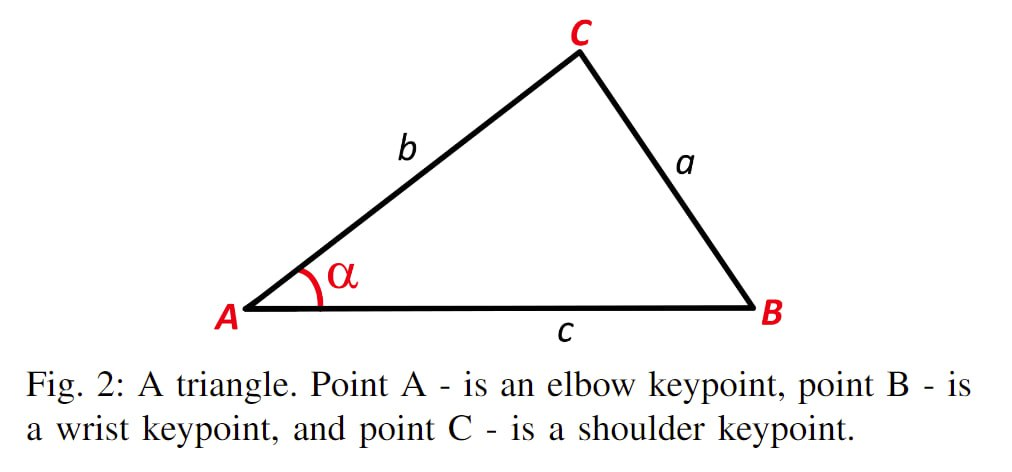

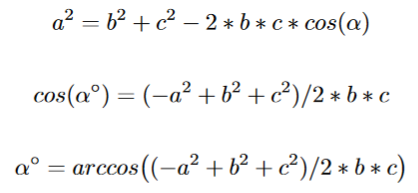

In [ ]:
def calculate_angle(p0,c,p1, output=False):
    # Input: point_0, point_1 and central point are pandas Series
    if (p0[0].shape == p1[0].shape) and (p0[0].shape == c[0].shape):

        p0c  = (c[0].sub(p0[0] ).pow(2) + c[1].sub(p0[1] ).pow(2) ).pow(1/2)    # p0->c   ((p0[x]-c[x] )^2  + (p0[y]-c[y] )^2)^(1/2)
        p1c  = (c[0].sub(p1[0] ).pow(2) + c[1].sub(p1[1] ).pow(2) ).pow(1/2)    # p1->c   ((p1[x]-c[x] )^2  + (p1[y]-c[y] )^2)^(1/2)
        p0p1 = (p1[0].sub(p0[0]).pow(2) + p1[1].sub(p0[1]).pow(2) ).pow(1/2)    # p0->p1  ((p0[x]-p1[x])^2  + (p0[y]-p1[y])^2)^(1/2)

        cos = (p1c.pow(2) + p0c.pow(2) - p0p1.pow(2)).div(p1c.mul(p0c).mul(2))

        angle_radian =  np.arccos( cos )
        angle_degrees = np.degrees( angle_radian )

        if output:
            print("Radians = ", angle_radian)
            print("Degrees = ", angle_degrees)

        # Output: radians, degress.
        return angle_radian, angle_degrees
    else:
        raise ValueError ("Input series' shapes mismatch")

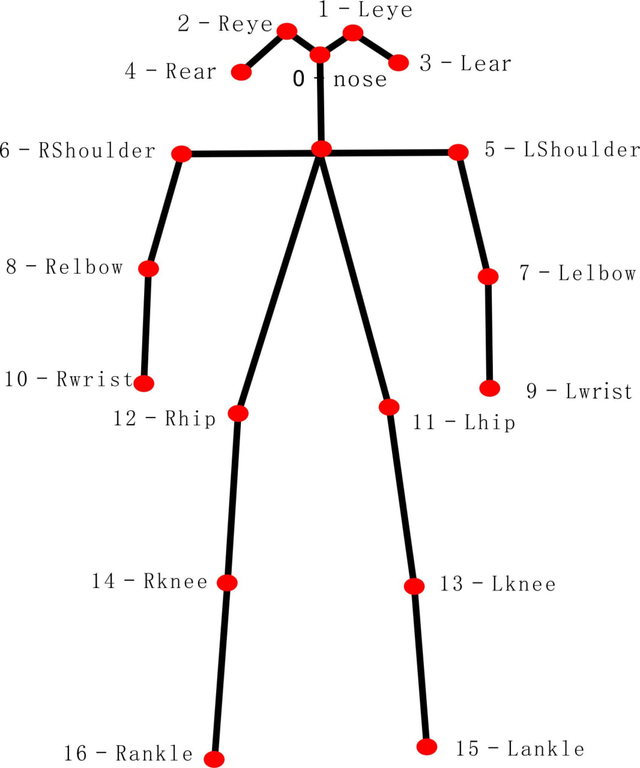

In [ ]:
# Form a triplet [p0(x,y), c(x,y), p1(x,y)]

left_shoulder  = X [ ['X5','Y5'] ]
right_shoulder = X [ ['X6','Y6'] ]
left_elbow     = X [ ['X7','Y7'] ]
right_elbow    = X [ ['X8','Y8'] ]

'''
left_shoulder  = df_select [ ['X5','Y5'] ]
right_shoulder = df_select [ ['X6','Y6'] ]
left_elbow     = df_select [ ['X7','Y7'] ]
right_elbow    = df_select [ ['X8','Y8'] ]
'''

"\nleft_shoulder  = df_select [ ['X5','Y5'] ]\nright_shoulder = df_select [ ['X6','Y6'] ]\nleft_elbow     = df_select [ ['X7','Y7'] ]\nright_elbow    = df_select [ ['X8','Y8'] ]\n"

In [ ]:
tls = right_shoulder,left_shoulder, left_elbow  #triplet_left_shoulder
trs = left_shoulder,right_shoulder, right_elbow #triplet_right_shoulder

p0 = [ tls[0].iloc[:,0],  tls[0].iloc[:,1] ]
c  = [ tls[1].iloc[:,0],  tls[1].iloc[:,1] ]
p1 = [ tls[2].iloc[:,0],  tls[2].iloc[:,1] ]
tls_degrees = calculate_angle(p0,c,p1, output=False) [1]

p0 = [ trs[0].iloc[:,0],  trs[0].iloc[:,1] ]
c  = [ trs[1].iloc[:,0],  trs[1].iloc[:,1] ]
p1 = [ trs[2].iloc[:,0],  trs[2].iloc[:,1] ]
trs_degrees = calculate_angle(p0,c,p1, output=False) [1]

del p0
del c
del p1

del left_shoulder
del right_shoulder
del left_elbow
del right_elbow


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
tls_degrees.isna().sum()

1285

In [ ]:
trs_degrees.isna().sum()

1325

In [ ]:
# Using DataFrame.insert() to add a column

X.insert(loc=len(X.columns), column="l_shoulder", value=tls_degrees, allow_duplicates=False)
X.insert(loc=len(X.columns), column="r_shoulder", value=trs_degrees, allow_duplicates=False)
'''
df_select.insert(loc=len(df_select.columns), column="l_shoulder", value=tls_degrees, allow_duplicates=False)
df_select.insert(loc=len(df_select.columns), column="r_shoulder", value=trs_degrees, allow_duplicates=False)
'''

'\ndf_select.insert(loc=len(df_select.columns), column="l_shoulder", value=tls_degrees, allow_duplicates=False)\ndf_select.insert(loc=len(df_select.columns), column="r_shoulder", value=trs_degrees, allow_duplicates=False)\n'

In [ ]:
# First, we need to create a new column to identify the chunks of 1000 rows
X['chunk'] = X.index // 1000
Y['chunk'] = Y.index // 1000

X['chunk'].unique()

In [ ]:
X['chunk'].value_counts(normalize=True)

0       0.000805
825     0.000805
832     0.000805
831     0.000805
830     0.000805
          ...   
413     0.000805
412     0.000805
411     0.000805
410     0.000805
1241    0.000805
Name: chunk, Length: 1242, dtype: float64

In [ ]:
# how much data will go to the TEST dataset
cur_test_size = 0.3 #30%

# Now, we can use the numpy.random.choice function to randomly select chunks for the test set
test_chunks = np.random.choice(X['chunk'].unique(), size=int(len(X['chunk'].unique())*cur_test_size), replace=False)

In [ ]:
print(len(test_chunks))

372


In [ ]:
# Split the DataFrame into train and test subsets

#ORIGINAL:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=cur_test_size, shuffle=False, stratify=None, random_state=None)



# We can then use the isin method to create a boolean mask to select the rows for the test set
test_mask = X['chunk'].isin(test_chunks)

# Finally, we can use the boolean mask to split the data into train and test sets
X_train = X[~test_mask]
X_test = X[test_mask]

Y_train = Y[~test_mask]
Y_test = Y[test_mask]

In [ ]:
print('X Train shape:', X_train.shape)
print('X Test shape:', X_test.shape)

print('Y Train shape:',  Y_train.shape)
print('Y Test shape:',   Y_test.shape)

X Train shape: (870000, 26)
X Test shape: (372000, 26)
Y Train shape: (870000, 11)
Y Test shape: (372000, 11)


In [ ]:
X_test['chunk'].value_counts(normalize=True)

0       0.002688
751     0.002688
788     0.002688
777     0.002688
774     0.002688
          ...   
385     0.002688
380     0.002688
378     0.002688
377     0.002688
1240    0.002688
Name: chunk, Length: 372, dtype: float64

In [ ]:
X_train['chunk'].value_counts(normalize=True)

2       0.001149
851     0.001149
836     0.001149
837     0.001149
839     0.001149
          ...   
431     0.001149
432     0.001149
433     0.001149
434     0.001149
1241    0.001149
Name: chunk, Length: 870, dtype: float64

In [ ]:
# Sort the DataFrame by index
X_test.sort_index(ascending=True, inplace=True)
X_test[['date','chunk']].head(1005)

# IT SHOULD BE CONTINUOUS for 1000 rows !

,date,chunk
0,2021-03-21 10:58:00,0
1,2021-03-21 10:58:01,0
2,2021-03-21 10:58:02,0
3,2021-03-21 10:58:03,0
4,2021-03-21 10:58:04,0
...,...,...
1000,2021-03-21 11:14:50,1
1001,2021-03-21 11:14:51,1
1002,2021-03-21 11:14:52,1
1003,2021-03-21 11:14:53,1


In [ ]:
# Finally, we can drop the "chunk" column from the train and test sets
'''
X_train = X_train.drop('chunk', axis=1)
X_test = X_test.drop('chunk', axis=1)

Y_train = Y_train.drop('chunk', axis=1)
Y_test = Y_test.drop('chunk', axis=1)
'''

"\nX_train = X_train.drop('chunk', axis=1)\nX_test = X_test.drop('chunk', axis=1)\n\nY_train = Y_train.drop('chunk', axis=1)\nY_test = Y_test.drop('chunk', axis=1)\n"

In [ ]:
# Legacy:
# it was removing fragments smaller than 300 after random mixing in text/train
# it does not work no longer
'''
X_train = highlight_fragments( X_train, 300, if_message=True)
X_test  = highlight_fragments( X_test , 300, if_message=True)
#
Y_train = highlight_fragments( Y_train, 300, if_message=True)
Y_test  = highlight_fragments( Y_test , 300, if_message=True)

# Group the dataframe by "fragment" and apply the custom function to each group
X_train = X_train.groupby('fragment').apply(cut_to_multiple_of_1000).reset_index(drop=True)
X_test  = X_test.groupby ('fragment').apply(cut_to_multiple_of_1000).reset_index(drop=True)
#
Y_train = Y_train.groupby('fragment').apply(cut_to_multiple_of_1000).reset_index(drop=True)
Y_test  = Y_test.groupby ('fragment').apply(cut_to_multiple_of_1000).reset_index(drop=True)

# Calculate the number of occurrences of each class in the "fragment" column
fragment_counts_TRAIN = X_train['fragment'].value_counts()
fragment_counts_TEST  = X_test ['fragment'].value_counts()

X_train = X_train.drop('fragment', axis=1)
X_test = X_test.drop('fragment', axis=1)

Y_train = Y_train.drop('fragment', axis=1)
Y_test = Y_test.drop('fragment', axis=1)
'''


'''
# save the Series to a text file
fragment_counts_TRAIN.to_csv('aaa_train.txt', index=False, header=False)
fragment_counts_TEST .to_csv('aaa_test.txt', index=False, header=False)
'''

"\n# save the Series to a text file\nfragment_counts_TRAIN.to_csv('aaa_train.txt', index=False, header=False)\nfragment_counts_TEST .to_csv('aaa_test.txt', index=False, header=False)\n"

In [ ]:
X_train = X_train.drop('date', axis=1)
X_test = X_test.drop('date', axis=1)

In [ ]:
print(len(X_test))
print(len(X_train))

372000
870000


In [ ]:
Y_train['NIHSS'].unique()

array([6., 3., 8., 0., 1., 4., 2., 5.])

In [ ]:
print('X Train shape:', X_train.shape)
print('X Test shape:', X_test.shape)

print('Y Train shape:',  Y_train.shape)
print('Y Test shape:',   Y_test.shape)

X Train shape: (870000, 25)
X Test shape: (372000, 25)
Y Train shape: (870000, 10)
Y Test shape: (372000, 11)


In [ ]:
os.chdir(PATH_to_process)

In [ ]:

# Save the array as a .csv file

X_test.to_csv('X_test2.csv', index=False)
X_train.to_csv('X_train2.csv', index=False)
Y_test.to_csv('Y_test2.csv', index=False)
Y_train.to_csv('Y_train2.csv', index=False)

'''
len(df_select)

# save csv
df_select.to_csv('full.csv', index=False)

# Convert the DataFrame to a NumPy array
npy_full = df_select.to_numpy()

# Save the NumPy array to a .npy file
np.save('full.npy', npy_full)
'''

"\nlen(df_select)\n\n# save csv\ndf_select.to_csv('full.csv', index=False)\n\n# Convert the DataFrame to a NumPy array\nnpy_full = df_select.to_numpy()\n\n# Save the NumPy array to a .npy file\nnp.save('full.npy', npy_full)\n"

1018000

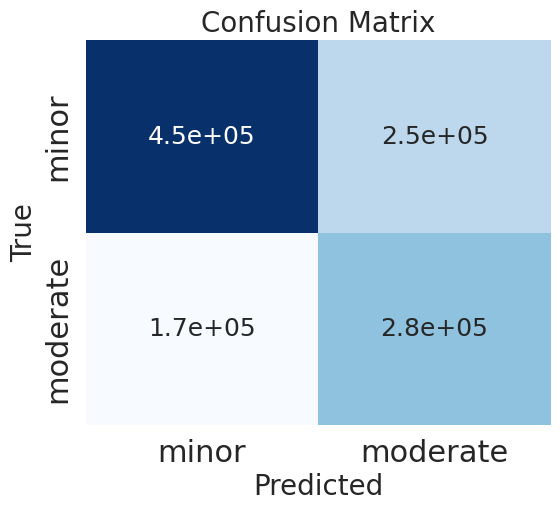

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Sample predicted and true values
#predicted = np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1])
#true = np.array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

# Calculate confusion matrix
#cm = confusion_matrix(true, predicted)
cm = [[453629,246371],[165458,284674]]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 5))
#sns.heatmap(cm, annot=True,  cmap="Blues", xticklabels=["minor", "moderate"], yticklabels=["minor", "moderate"]) #fmt="d",

sns.set(font_scale = 2)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=["minor", "moderate"], yticklabels=["minor", "moderate"], cbar=False, annot_kws={"size": 18}) #fmt="d",
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('True', fontsize=20)
plt.title('Confusion Matrix', fontsize=20)
plt.show()